In [239]:
# Import pandas
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import os
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [240]:
# Read in dataset
kickstarter_df = pd.read_csv(os.getcwd()+os.sep+'KickstarterData.csv')
pd.set_option('display.max_columns', None)

In [241]:
# Print header
kickstarter_df.head()
#Dimensions of the data and investigate if there are any duplicate rows
kickstarter_df.shape

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,7/1/19,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,7/1/19,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,7/1/19,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,7/1/19,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,7/1/19,male,100,white,1,vanilla,yes,<50K,yes,7,0


(10000, 12)

In [242]:
# Print info
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Donate ID                             10000 non-null  int64 
 1   Donate Date                           10000 non-null  object
 2   Gender                                10000 non-null  object
 3   Deposit Amount                        10000 non-null  int64 
 4   Preferred Color of Device             10000 non-null  object
 5   Ice Cream Products Consumed Per Week  10000 non-null  int64 
 6   Favorite Flavor Of Ice Cream          10000 non-null  object
 7   Donated To Kick Starter Before        10000 non-null  object
 8   Household Income                      10000 non-null  object
 9   Do you own a Keurig                   10000 non-null  object
 10  How many desserts do you eat a week   10000 non-null  int64 
 11  Purchased                    

In [243]:
# Take a look at unique values in telco
kickstarter_df.nunique()
# Finding the null values for each column
print(kickstarter_df.isnull().sum())

Donate ID                               10000
Donate Date                                 7
Gender                                      2
Deposit Amount                            302
Preferred Color of Device                   6
Ice Cream Products Consumed Per Week       11
Favorite Flavor Of Ice Cream                5
Donated To Kick Starter Before              2
Household Income                            4
Do you own a Keurig                         2
How many desserts do you eat a week        11
Purchased                                   2
dtype: int64

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64


In [244]:
#Calculate summary statistics
summary = kickstarter_df.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(kickstarter_df.describe(include='all'))

,count,unique,top,freq
Donate Date,10000,7,7/7/19,3014
Gender,10000,2,male,5274
Preferred Color of Device,10000,6,silver,1706
Favorite Flavor Of Ice Cream,10000,5,swirl,2067
Donated To Kick Starter Before,10000,2,yes,6756


          Donate ID Donate Date Gender  Deposit Amount  \
count   10000.00000       10000  10000    10000.000000   
unique          NaN           7      2             NaN   
top             NaN      7/7/19   male             NaN   
freq            NaN        3014   5274             NaN   
mean     5000.50000         NaN    NaN      139.515800   
std      2886.89568         NaN    NaN       80.483091   
min         1.00000         NaN    NaN        0.000000   
25%      2500.75000         NaN    NaN      100.000000   
50%      5000.50000         NaN    NaN      100.000000   
75%      7500.25000         NaN    NaN      119.000000   
max     10000.00000         NaN    NaN      400.000000   

       Preferred Color of Device  Ice Cream Products Consumed Per Week  \
count                      10000                          10000.000000   
unique                         6                                   NaN   
top                       silver                                   NaN   
freq   

In [245]:
pandas_profiling.ProfileReport(kickstarter_df)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


<AxesSubplot:>

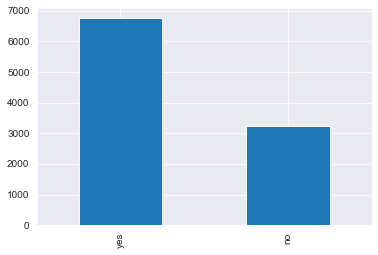

In [246]:
kickstarter_df['Donated To Kick Starter Before'].value_counts().plot(kind='bar')

[Text(0.5, 0, 'Favorite Flavor Of Ice Cream'), Text(0, 0.5, 'Count')]

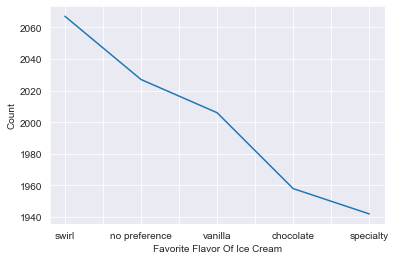

In [247]:
kickstarter_df['Favorite Flavor Of Ice Cream'].value_counts().plot().set(xlabel="Favorite Flavor Of Ice Cream", ylabel="Count")

<AxesSubplot:>

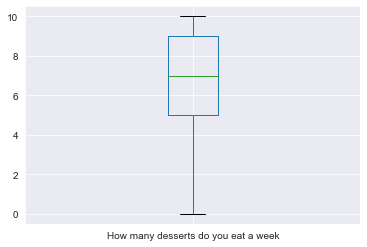

In [248]:
kickstarter_df.boxplot(column=['How many desserts do you eat a week'])

Text(0.5, 1.0, 'Outlier for Deposit Amount')

Text(0.5, 0, 'Donate ID')

Text(0, 0.5, 'Deposit Amount')

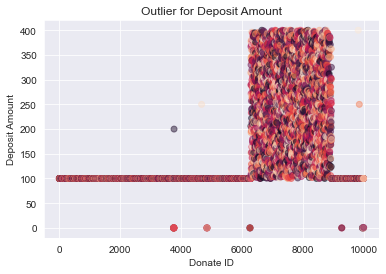

In [249]:
colors = np.random.rand(10000)
area = (30 * np.random.rand(50))**2  # 0 to 15 point radii

plt.scatter(kickstarter_df['Donate ID'], kickstarter_df['Deposit Amount'],c=colors, alpha=0.5)
plt.title("Outlier for Deposit Amount")
plt.xlabel("Donate ID")
plt.ylabel("Deposit Amount")
plt.show()

In [250]:
# Print # of missing values
kickstarter_df.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [251]:
kickstarter_df['Ice Cream Products Consumed Per Week'].describe()

count    10000.000000
mean         4.962300
std          3.165293
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Ice Cream Products Consumed Per Week, dtype: float64

In [252]:
kickstarter_df.drop('Donate ID', axis = 1, inplace = True)
kickstarter_df.drop('Household Income', axis = 1, inplace = True)


In [298]:
x = kickstarter_df['Donated To Kick Starter Before'].replace({'no': 0, 'yes':1})
y = kickstarter_df['Do you own a Keurig'].replace({'no': 0, 'yes':1})
z = (x*y).value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

([<matplotlib.patches.Wedge at 0x7fe81b000780>,
 [Text(-0.16012162238289038, 1.0882835411993839, 'Own Keurig and donated to Kick starter before'),
  Text(0.16012172427534846, -1.0882835262077108, 'Other')],
 [Text(-0.08733906675430383, 0.593609204290573, '55%'),
  Text(0.08733912233200823, -0.5936091961132968, '45%')])

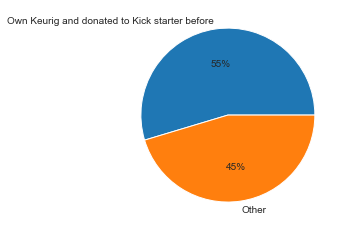

In [254]:
plt.pie(z,autopct='%.0f%%', labels=['Own Keurig and donated to Kick starter before','Other'])
plt.show()

In [255]:
#Female Deposit average
kickstarter_df_without_men = kickstarter_df[kickstarter_df['Gender'] != 'male']
kickstarter_df_without_men['Deposit Amount'].mean()

139.9743969530258

In [256]:
#Male deposit average
kickstarter_df_without_women = kickstarter_df[kickstarter_df['Gender'] != 'female']
kickstarter_df_without_women['Deposit Amount'].mean()

139.10485400075845

In [257]:
kickstarter_df

,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,7/1/19,female,100,white,4,vanilla,yes,yes,7,0
1,7/1/19,female,100,blue,5,vanilla,yes,yes,5,1
2,7/1/19,female,100,silver,6,vanilla,yes,yes,6,1
3,7/1/19,female,100,silver,5,vanilla,yes,yes,5,1
4,7/1/19,male,100,white,1,vanilla,yes,yes,7,0
...,...,...,...,...,...,...,...,...,...,...
9995,7/9/19,male,100,black,4,chocolate,no,no,5,1
9996,7/9/19,male,100,silver,6,no preference,yes,yes,6,0
9997,7/9/19,male,0,blue,3,chocolate,yes,yes,5,0
9998,7/9/19,male,0,blue,6,vanilla,no,no,6,0


<AxesSubplot:>

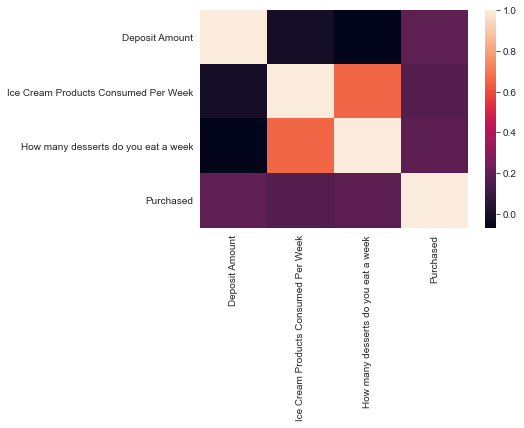

In [258]:
sns.heatmap(kickstarter_df.corr())

In [259]:
#Null accuracy
kickstarter_df['Purchased'].value_counts() / kickstarter_df.shape[0]

1    0.6513
0    0.3487
Name: Purchased, dtype: float64

<AxesSubplot:>

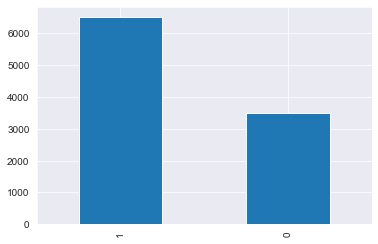

In [260]:
kickstarter_df['Purchased'].value_counts().plot(kind='bar')

In [261]:
df_adjusted = kickstarter_df

In [262]:
df_adjusted['Do you own a Keurig'] = df_adjusted['Do you own a Keurig'].replace({'no': 0, 'yes':1})
df_adjusted['Donated To Kick Starter Before'] = df_adjusted['Donated To Kick Starter Before'].replace({'no': 0, 'yes':1})
df_adjusted['Gender'] = df_adjusted['Gender'].replace({'male': 0, 'female':1})

In [263]:
# Get all features
features = [column_name for column_name in df_adjusted.columns if column_name != 'Purchased']

# Get all categorical features
categorical = [column_name for column_name in features if df_adjusted[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

features
categorical
numeric

['Donate Date',
 'Gender',
 'Deposit Amount',
 'Preferred Color of Device',
 'Ice Cream Products Consumed Per Week',
 'Favorite Flavor Of Ice Cream',
 'Donated To Kick Starter Before',
 'Do you own a Keurig',
 'How many desserts do you eat a week']

['Donate Date', 'Preferred Color of Device', 'Favorite Flavor Of Ice Cream']

['Gender',
 'Deposit Amount',
 'Ice Cream Products Consumed Per Week',
 'Donated To Kick Starter Before',
 'Do you own a Keurig',
 'How many desserts do you eat a week']

In [264]:
X = df_adjusted[features]
X = sm.add_constant(X)
Y = df_adjusted['Purchased']

In [265]:
X = pd.get_dummies(X, columns = categorical,  drop_first = True)

In [266]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)

In [267]:
log_reg = sm.OLS(train_Y, train_X).fit()

In [296]:
# printing the summary table
print(log_reg.summary())


                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:18:15   Log-Likelihood:                -3554.5
No. Observations:                8000   AIC:                             7153.
Df Residuals:                    7978   BIC:                             7307.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [271]:
from statsmodels.tools.eval_measures import rmse

prediction = log_reg.predict(test_X)
results = list(map(round, prediction))
 

In [272]:
rmse_value = rmse(test_Y, prediction)
print('RMSE : '+str(rmse_value))

RMSE : 0.3769657206839104


In [273]:
#Import Decision Tree Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
clf=DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_X,train_Y)



DecisionTreeClassifier()

In [274]:
rf_prediction=clf.predict(test_X)

In [275]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_Y, rf_prediction))

Accuracy: 0.855


In [276]:
feature_imp = pd.Series(clf.feature_importances_,index=[column_name for column_name in X.columns if column_name != 'Purchased']).sort_values(ascending=False)
feature_imp

Preferred Color of Device_no preference       0.191521
Deposit Amount                                0.132125
How many desserts do you eat a week           0.129818
Ice Cream Products Consumed Per Week          0.110598
Favorite Flavor Of Ice Cream_no preference    0.073000
Donated To Kick Starter Before                0.058569
Gender                                        0.047746
Do you own a Keurig                           0.031366
Donate Date_7/7/19                            0.026647
Donate Date_7/6/19                            0.023920
Donate Date_7/8/19                            0.020596
Favorite Flavor Of Ice Cream_vanilla          0.020340
Favorite Flavor Of Ice Cream_swirl            0.018422
Preferred Color of Device_red                 0.018095
Preferred Color of Device_blue                0.017855
Preferred Color of Device_silver              0.016070
Donate Date_7/2/19                            0.015553
Favorite Flavor Of Ice Cream_specialty        0.014983
Preferred 

In [277]:
print('Decision Tree MSE:', metrics.mean_squared_error(test_Y, rf_prediction))  

Decision Tree MSE: 0.145


In [278]:
print('Logistic Regression MSE:', metrics.mean_squared_error(test_Y, prediction))  

Logistic Regression MSE: 0.14210315457073994


In [279]:
from xgboost import XGBClassifier

In [280]:
xgb = XGBClassifier()
xgb.fit(train_X.values,train_Y.values)


XGBClassifier()

In [281]:
xgb_prediction = xgb.predict(test_X.values)

In [282]:
print("XGBoost MSE: ",metrics.mean_squared_error(test_Y,xgb_prediction))

XGBoost MSE:  0.154


In [283]:
feature_imp = pd.Series(xgb.feature_importances_,index=[column_name for column_name in X.columns if column_name != 'Purchased']).sort_values(ascending=False)
feature_imp

Preferred Color of Device_no preference       0.226772
Favorite Flavor Of Ice Cream_no preference    0.134610
How many desserts do you eat a week           0.110062
Deposit Amount                                0.093191
Ice Cream Products Consumed Per Week          0.085150
Donated To Kick Starter Before                0.050737
Gender                                        0.047151
Favorite Flavor Of Ice Cream_swirl            0.044417
Donate Date_7/7/19                            0.041384
Do you own a Keurig                           0.032819
Donate Date_7/5/19                            0.026569
Favorite Flavor Of Ice Cream_specialty        0.026240
Donate Date_7/6/19                            0.026026
Donate Date_7/8/19                            0.020383
Favorite Flavor Of Ice Cream_vanilla          0.016882
Donate Date_7/2/19                            0.010145
Preferred Color of Device_silver              0.005756
Donate Date_7/9/19                            0.001707
Preferred 

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Mean Squared Error')

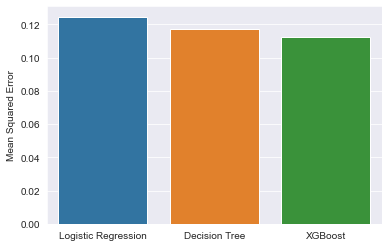

In [284]:

x = ['Logistic Regression', 'Decision Tree', 'XGBoost']
y = [0.124619038455792, 0.1175, 0.1125]

sns.barplot(x, y).set_ylabel('Mean Squared Error')
plt.show()

/opt/anaconda3/envs/tensor_flow/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Time taken in seconds')

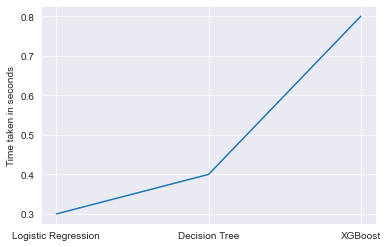

In [285]:
x = ['Logistic Regression', 'Decision Tree', 'XGBoost']
y = [0.3, 0.4, 0.8]

sns.lineplot(x, y).set_ylabel('Time taken in seconds')
plt.show()

([<matplotlib.patches.Wedge at 0x7fe81b91ebe0>,
 [Text(-0.14951534272923026, 1.089791338875732, 'Own Keurig and donated to Kick starter before'),
  Text(0.14951534272922962, -1.0897913388757323, 'Other')],
 [Text(-0.08155382330685286, 0.5944316393867629, '54%'),
  Text(0.0815538233068525, -0.594431639386763, '46%')])

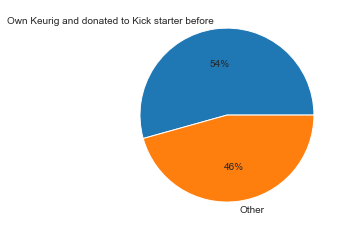

In [301]:
x = df_adjusted['Donated To Kick Starter Before']
y = df_adjusted['Purchased']
z = (x*y).value_counts()
plt.pie(z,autopct='%.0f%%', labels=['Own Keurig and donated to Kick starter before','Other'])
plt.show()